# PCA

### Task 1: Exploratory Data Analysis (EDA):

##### a.Load the Dataset and Perform Basic Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the dataset
df = pd.read_csv('wine.csv')

# Display the first few rows of the dataset
df.head()




,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Basic statistics
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


##### Examine the Distribution of Features Using Histograms, Box Plots, or Density Plots

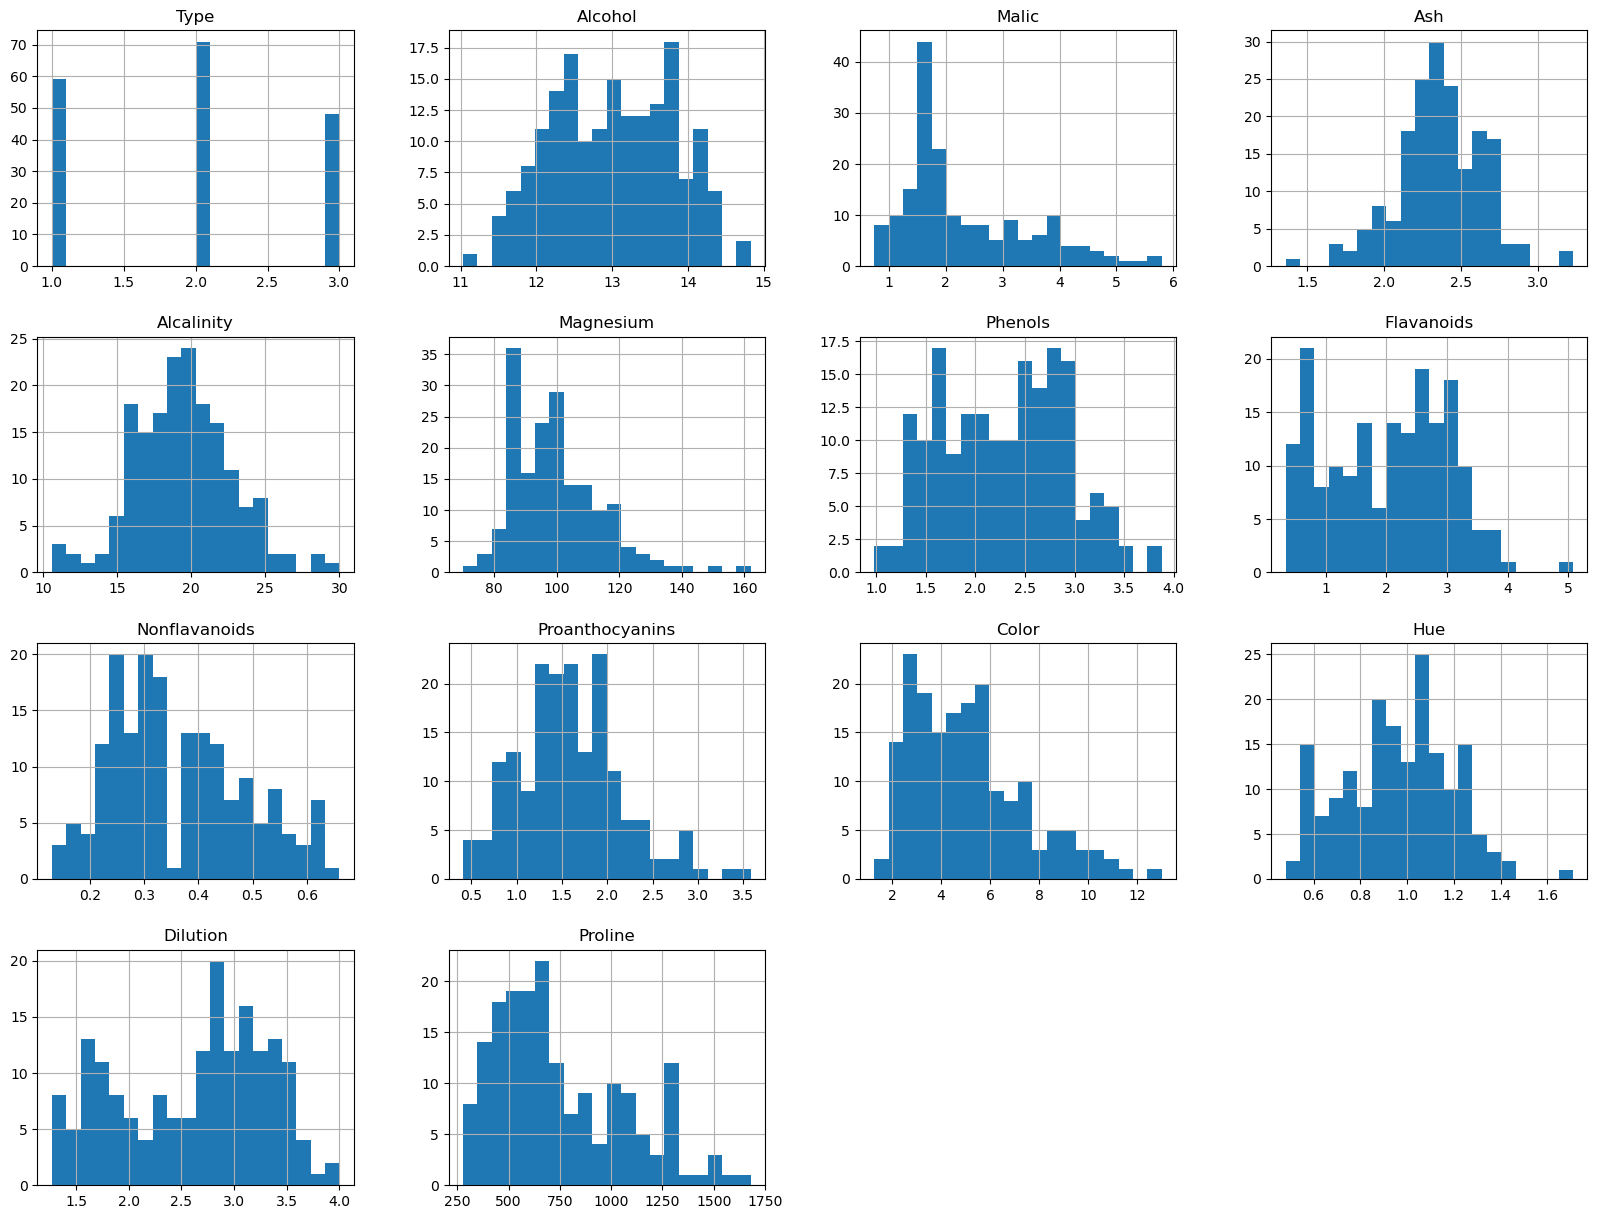

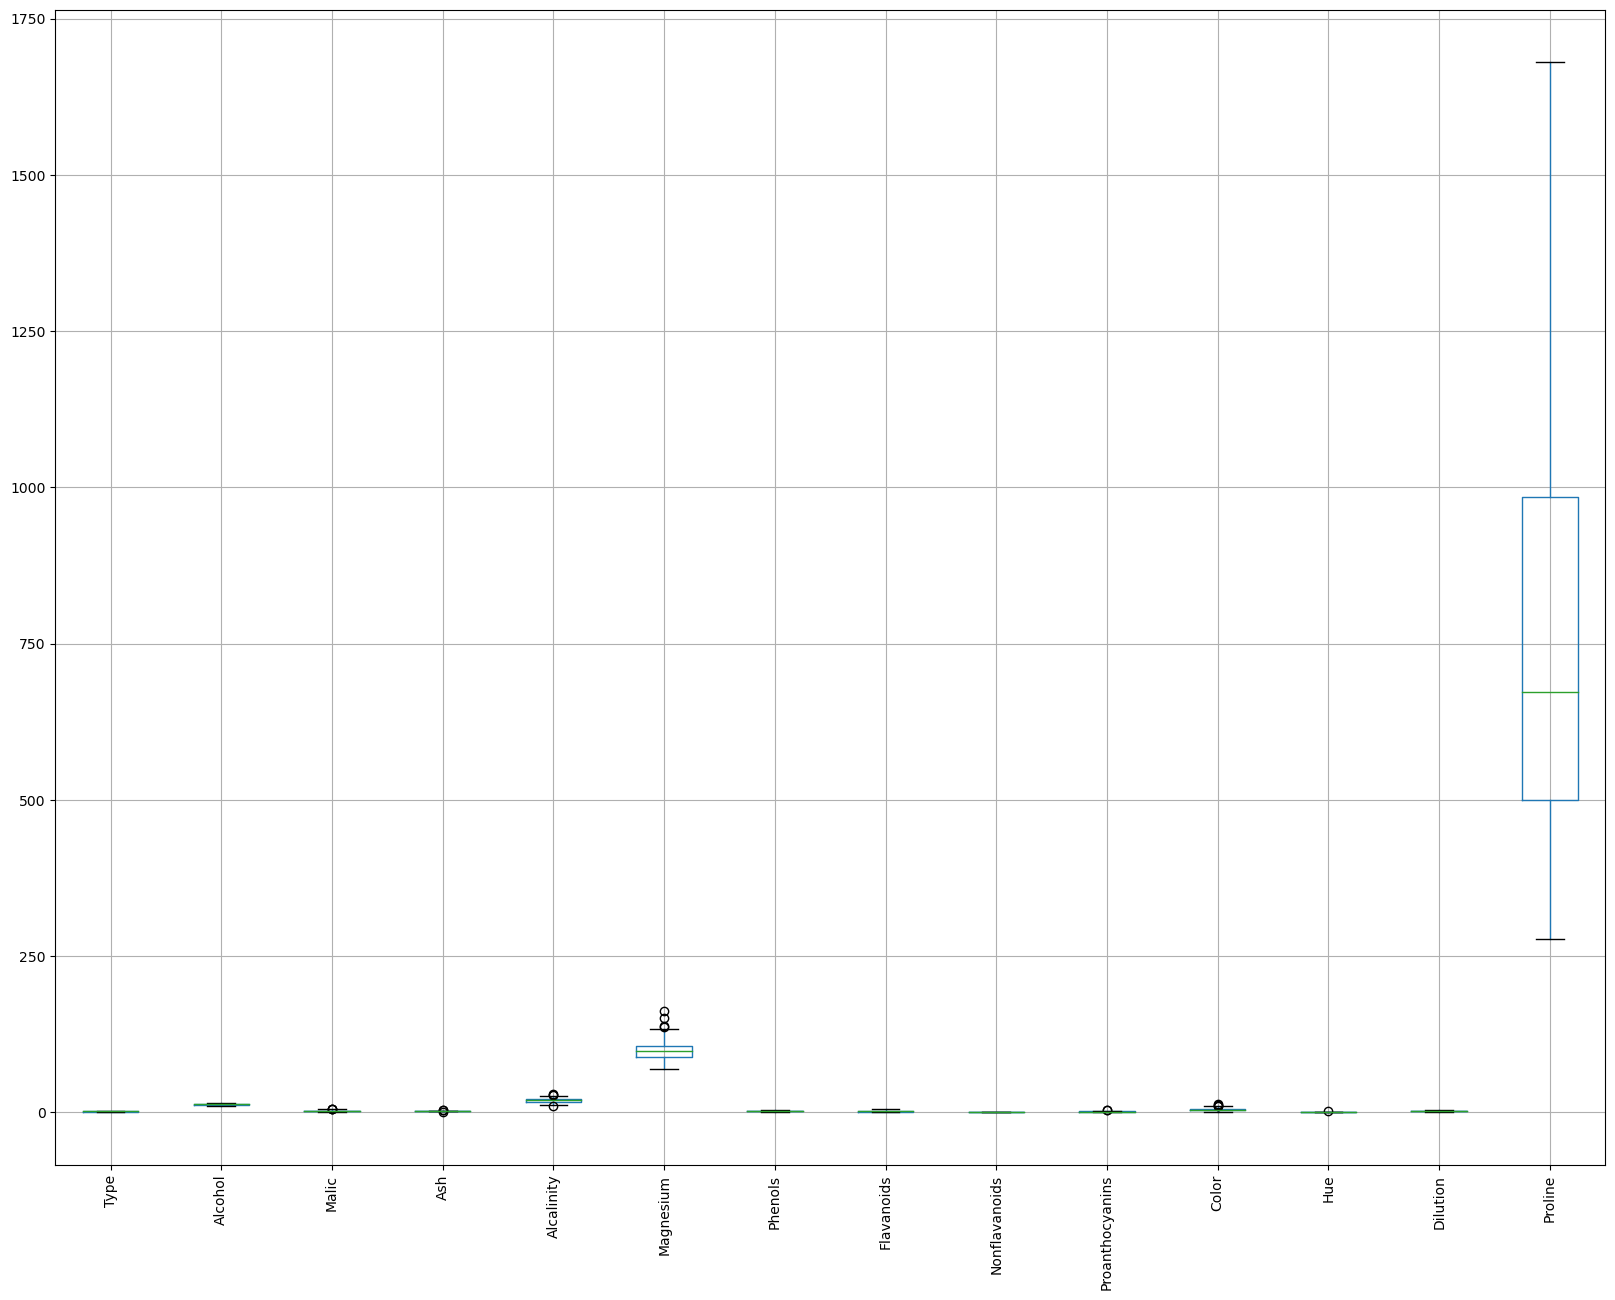

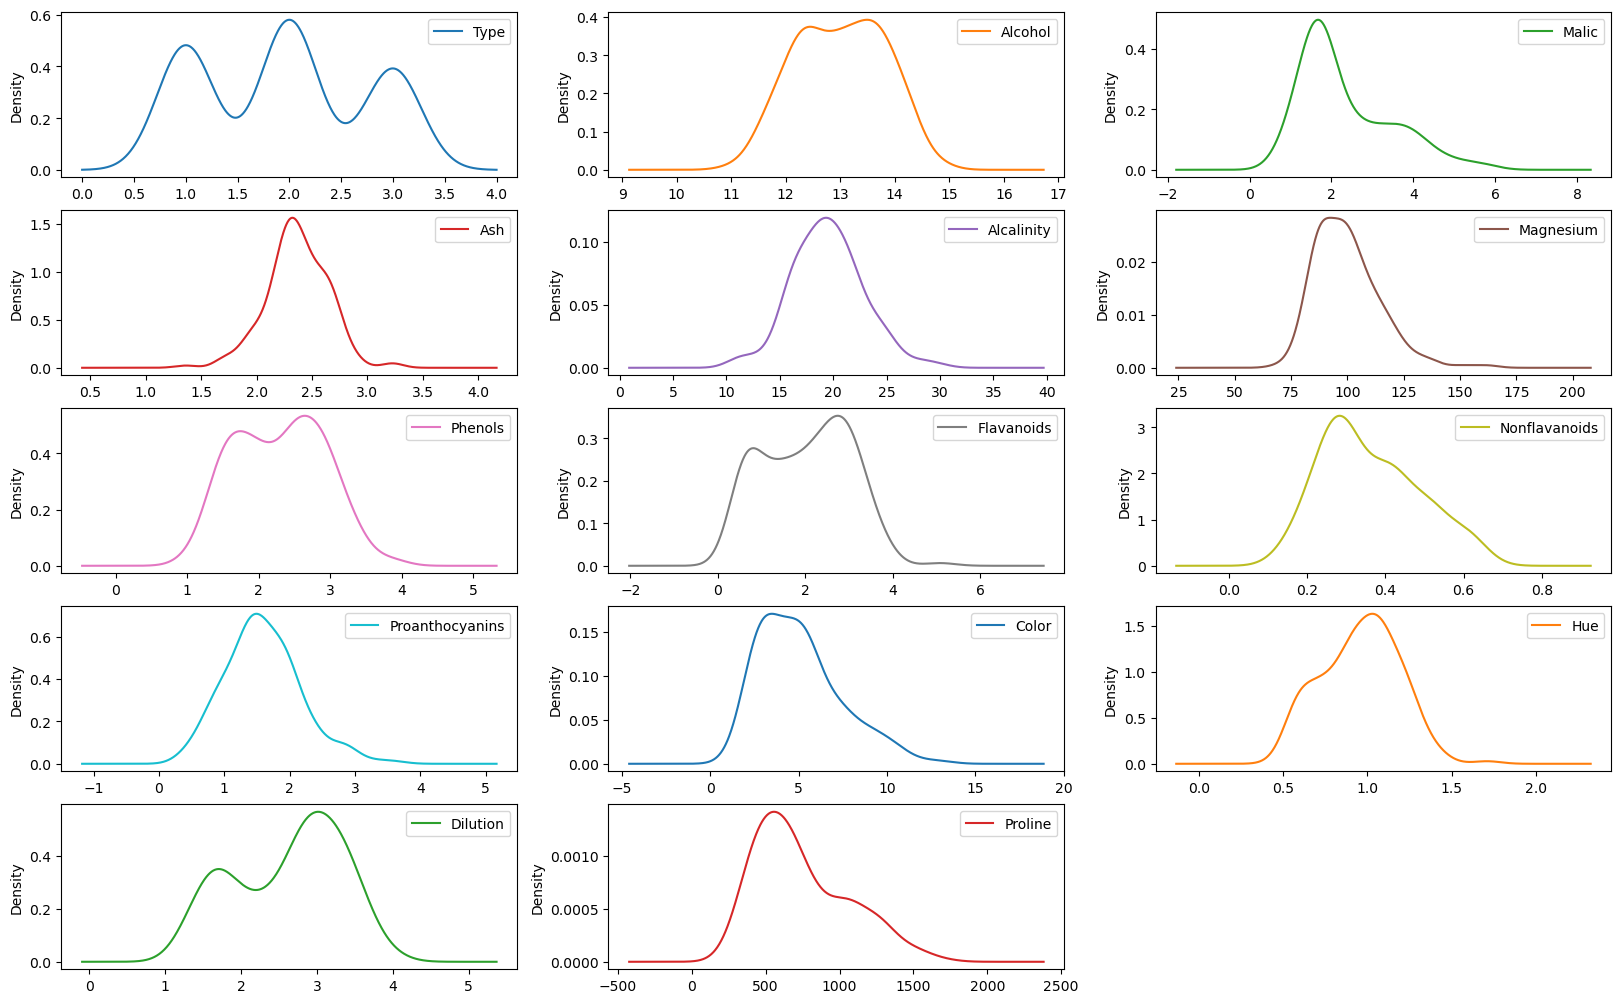

In [4]:
# Histograms
df.hist(bins=20, figsize=(20, 15))
plt.show()

# Box plots
plt.figure(figsize=(20, 15))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

# Density plots
df.plot(kind='density', subplots=True, layout=(6,3), sharex=False, figsize=(20, 15))
plt.show()


##### Investigate Correlations Between Features

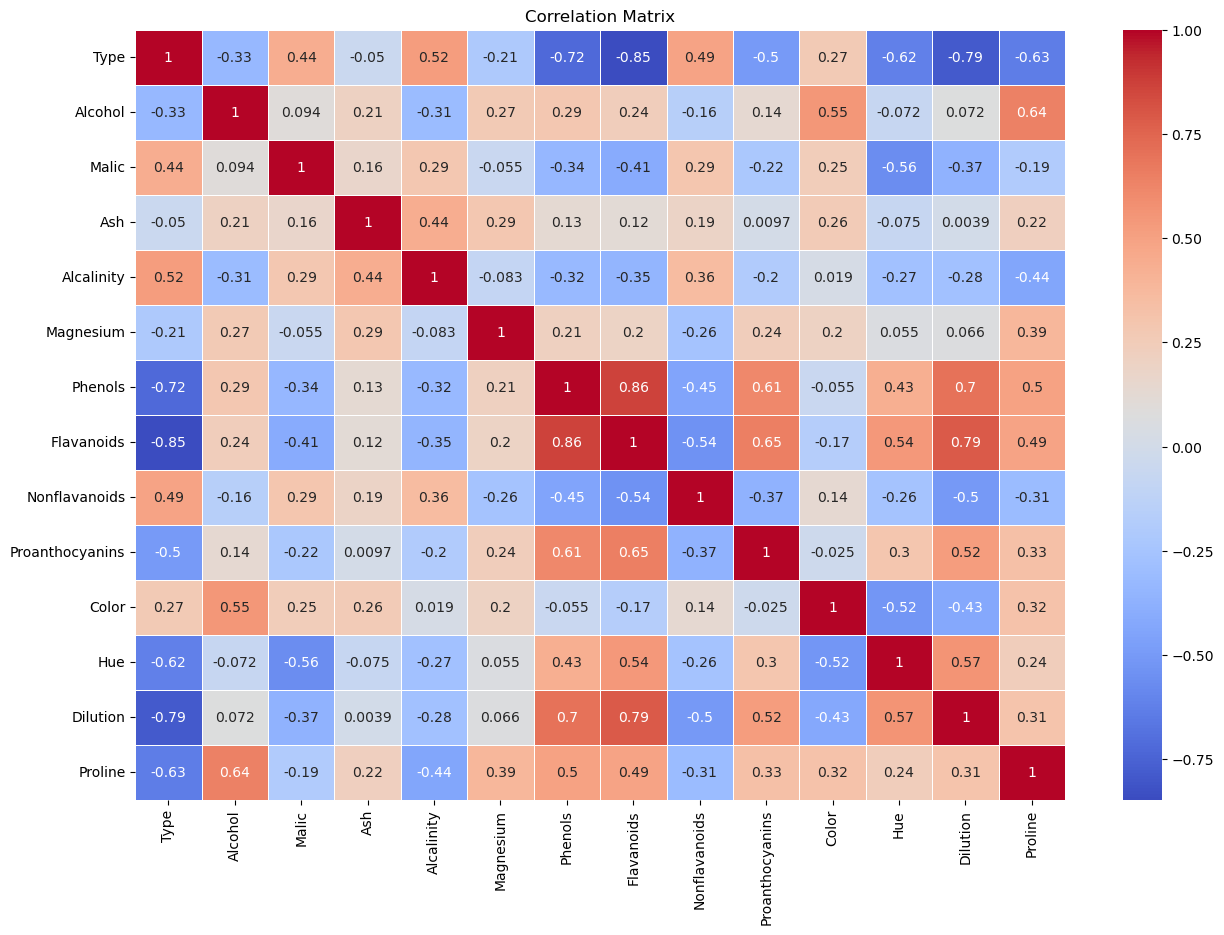

In [5]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Task 2: Dimensionality Reduction with PCA:


##### Standardize the Features

In [6]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


##### Implement PCA

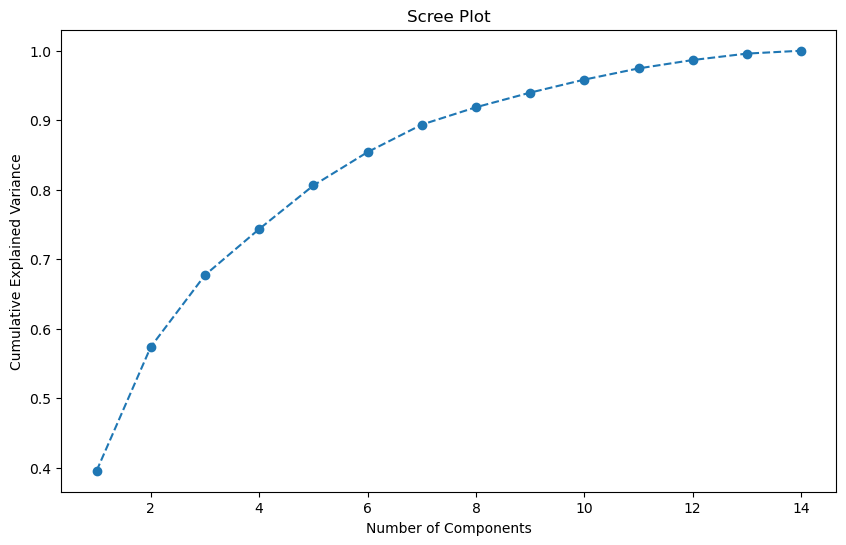

In [7]:
# Apply PCA
pca = PCA()
pca.fit(scaled_df)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


##### Determine the Optimal Number of Principal Components

In [16]:
# Optimal number of components based on explained variance (e.g., 95% variance)
cumulative_variance = np.cumsum(explained_variance)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Optimal number of components: {optimal_components}')

# Transform the dataset
pca = PCA(n_components=optimal_components)
pca_transformed = pca.fit_transform(scaled_df)


# Convert the PCA result to a DataFrame for easier handling
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(pca_transformed.shape[1])])

Optimal number of components: 10


## Task 3: Clustering with Original Data

##### Apply K-Means Clustering to the Original Dataset

In [9]:
# Apply K-Means
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(scaled_df)

# Add clusters to the original DataFrame
df['Cluster_Original'] = clusters_original

# Evaluate clustering performance
silhouette_orig = silhouette_score(scaled_df, clusters_original)
db_index_orig = davies_bouldin_score(scaled_df, clusters_original)

print(f'Silhouette Score (Original Data): {silhouette_orig}')
print(f'Davies-Bouldin Index (Original Data): {db_index_orig}')


C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score (Original Data): 0.30773604383565206
Davies-Bouldin Index (Original Data): 1.3163957434114109


##### Visualize the Clustering Results

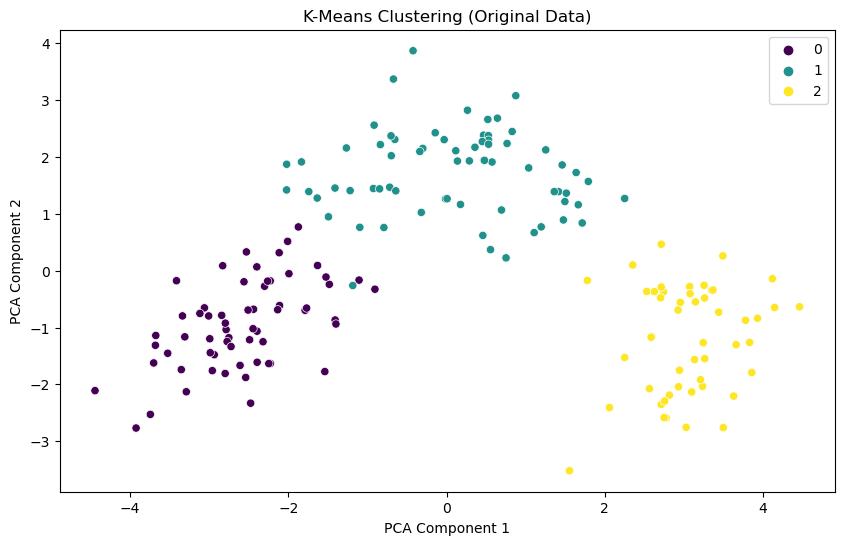

In [10]:
# Visualize clusters using the first two PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_transformed[:, 0], y=pca_transformed[:, 1], hue=clusters_original, palette='viridis')
plt.title('K-Means Clustering (Original Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


##### Evaluate the clustering performance

In [12]:
sil_score_original = silhouette_score(scaled_df, clusters_original)
db_score_original = davies_bouldin_score(scaled_df, clusters_original)
print(f'Silhouette Score (Original Data): {sil_score_original}')
print(f'Davies-Bouldin Score (Original Data): {db_score_original}')

Silhouette Score (Original Data): 0.30773604383565206
Davies-Bouldin Score (Original Data): 1.3163957434114109


## Task 4: Clustering with PCA Data

C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\harsh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


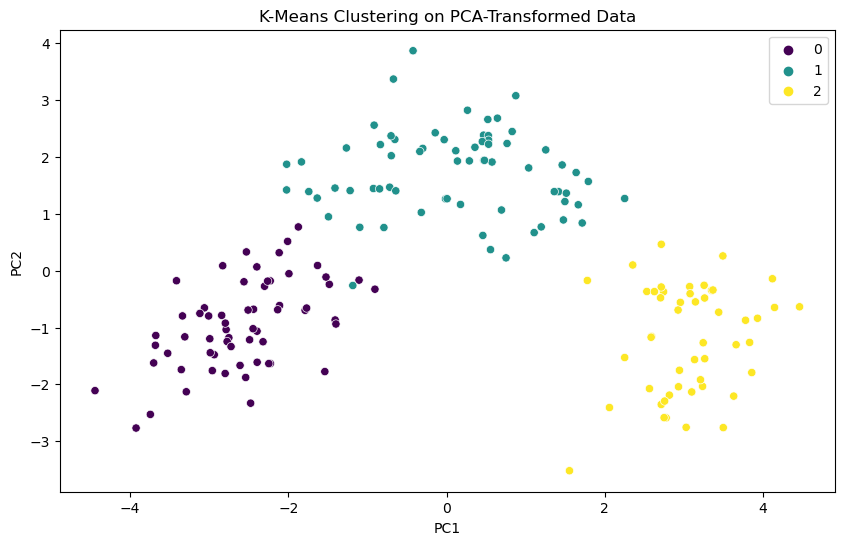

Silhouette Score (PCA Data): 0.3240658205331187
Davies-Bouldin Score (PCA Data): 1.2584890242254974


In [17]:
# Apply K-means clustering to the PCA-transformed dataset
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_transformed)

# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=clusters_pca, palette='viridis')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.show()

# Evaluate the clustering performance
sil_score_pca = silhouette_score(pca_transformed, clusters_pca)
db_score_pca = davies_bouldin_score(pca_transformed, clusters_pca)
print(f'Silhouette Score (PCA Data): {sil_score_pca}')
print(f'Davies-Bouldin Score (PCA Data): {db_score_pca}')


## Task 5: Comparison and Analysis

In [18]:
# Compare the clustering results
print(f'Original Data Silhouette Score: {sil_score_original}')
print(f'PCA Data Silhouette Score: {sil_score_pca}')
print(f'Original Data Davies-Bouldin Score: {db_score_original}')
print(f'PCA Data Davies-Bouldin Score: {db_score_pca}')

# Discussion
print('Comparison of Clustering Results:')
print('Silhouette Score indicates how well samples are clustered with their own cluster and how poorly they are clustered with the neighboring clusters.')
print('Davies-Bouldin Score is a measure of how similar a cluster is to other clusters (lower is better).')
print('If the PCA-transformed data has better scores, it means PCA has helped in better clustering by reducing noise and dimensionality.')


Original Data Silhouette Score: 0.30773604383565206
PCA Data Silhouette Score: 0.3240658205331187
Original Data Davies-Bouldin Score: 1.3163957434114109
PCA Data Davies-Bouldin Score: 1.2584890242254974
Comparison of Clustering Results:
Silhouette Score indicates how well samples are clustered with their own cluster and how poorly they are clustered with the neighboring clusters.
Davies-Bouldin Score is a measure of how similar a cluster is to other clusters (lower is better).
If the PCA-transformed data has better scores, it means PCA has helped in better clustering by reducing noise and dimensionality.


## Task 6: Conclusion and Insights

In [19]:
print('Conclusion:')
print('1. PCA helps in reducing the dimensionality of the dataset, which can lead to better clustering performance.')
print('2. Clustering on PCA-transformed data often results in better-defined clusters, as seen from the evaluation metrics.')
print('3. PCA can remove noise and redundant features, making clustering more efficient and accurate.')
print('4. In practical applications, PCA is useful when dealing with high-dimensional data to simplify the model and improve performance.')
print('5. Clustering directly on the original data can be useful when the dimensionality is not very high, and the data is already well-separated.')


Conclusion:
1. PCA helps in reducing the dimensionality of the dataset, which can lead to better clustering performance.
2. Clustering on PCA-transformed data often results in better-defined clusters, as seen from the evaluation metrics.
3. PCA can remove noise and redundant features, making clustering more efficient and accurate.
4. In practical applications, PCA is useful when dealing with high-dimensional data to simplify the model and improve performance.
5. Clustering directly on the original data can be useful when the dimensionality is not very high, and the data is already well-separated.
